In [2]:
import os  # OS operations like file handling
import random  # Random number generation
import pandas as pd  # Data manipulation 
from PIL import Image  # Image processing
import cv2  # Computer vision tasks
from IPython.display import Video  # Display videos in Jupyter notebooks
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting graphs and visualizations
import seaborn as sns  # Statistical data visualizations
sns.set_theme(style='darkgrid')
import pathlib  # File system paths handling
import glob  # File pattern matching (e.g., search for files)
from tqdm.notebook import trange, tqdm  # Progress bars in notebooks
import warnings  # Manage warning messages
warnings.filterwarnings('ignore')
from ultralytics import YOLO 

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\USER\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


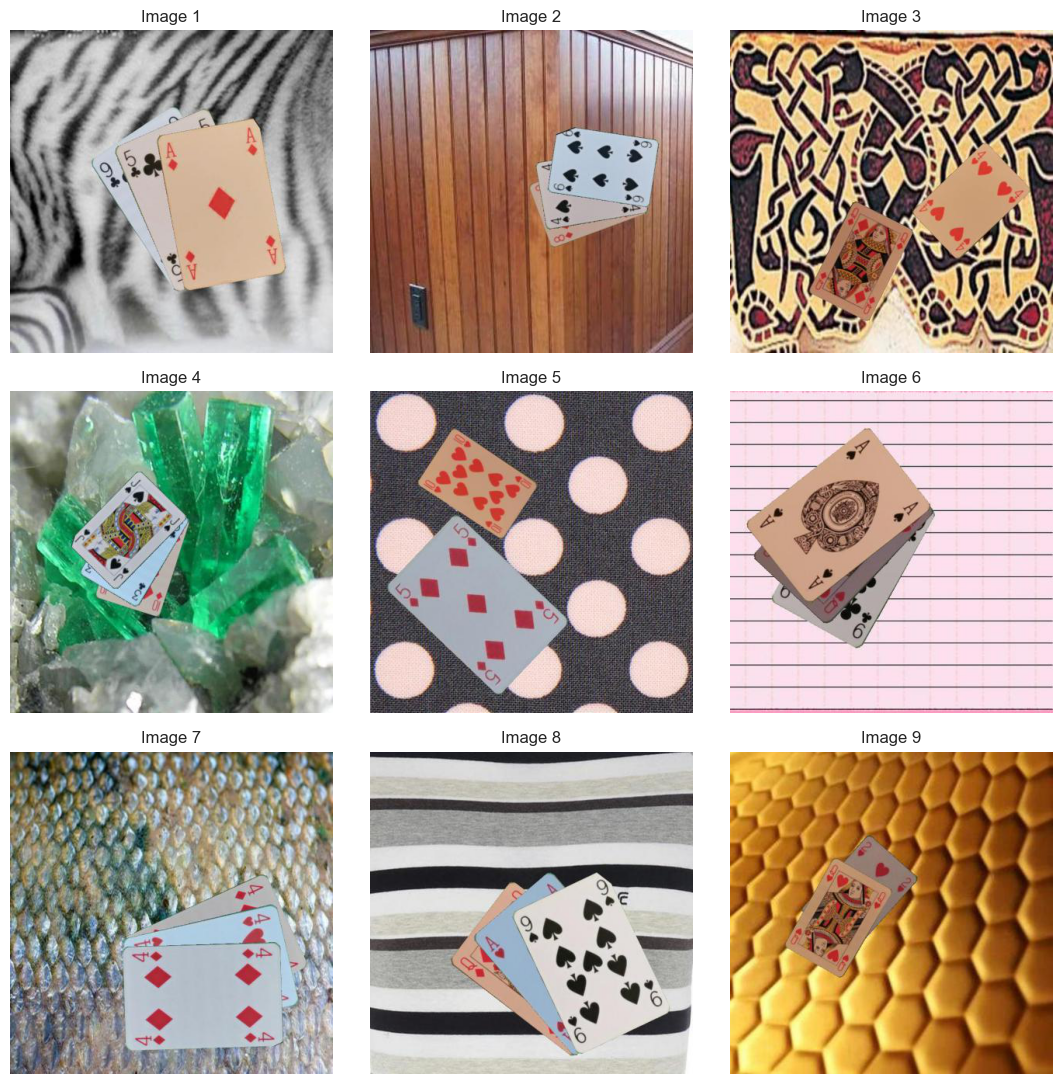

In [3]:
training_images_dir = './data/train/images'
num_samples = 9
image_files = os.listdir(training_images_dir)
rand_images = random.sample(image_files, num_samples) # Display 9 random images

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(training_images_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Final_model = YOLO('yolov8n.pt')
Final_model = YOLO("./runs/detect/train3/weights/last.pt")
# Training The Final Model
Result_Final_model = Final_model.train(
    data="/Users/USER/BlackjackAI/data/data.yaml",
    device="cpu",
    resume=False,
    save_period=1,
    epochs=30,
    batch=52,
    optimizer="auto",
)

Ultralytics 8.3.35  Python-3.12.7 torch-2.5.1 CPU (Intel Core(TM) i5-10210U 1.60GHz)
engine\trainer: task=detect, mode=train, model=./runs/detect/train3/weights/last.pt, data=/Users/USER/BlackjackAI/data/data.yaml, epochs=30, time=None, patience=100, batch=52, imgsz=640, save=True, save_period=1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 6.01MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 


  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256,

train: Scanning C:\Users\USER\BlackjackAI\data\train\labels... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [01:41<00:00, 137.51it/s]


train: New cache created: C:\Users\USER\BlackjackAI\data\train\labels.cache


val: Scanning C:\Users\USER\BlackjackAI\data\valid\labels... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:24<00:00, 165.98it/s]


val: New cache created: C:\Users\USER\BlackjackAI\data\valid\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00040625000000000004), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/270 [00:00<?, ?it/s]

In [ ]:
Valid_model = YOLO("./runs/detect/train3/weights/best.pt")

In [ ]:
dataset_path = "./data"
test_images_path = os.path.join(dataset_path, "test", "images")

# List of all jpg images in the directory
image_files = [file for file in os.listdir(test_images_path) if file.endswith(".jpg")]


0: 640x640 2 2ss, 1 5d, 1 Qh, 56.3ms
Speed: 1.9ms preprocess, 56.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 9cs, 2 Kds, 62.9ms
Speed: 0.9ms preprocess, 62.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 7ss, 2 9ds, 60.2ms
Speed: 1.9ms preprocess, 60.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 3ss, 1 6d, 1 Qs, 44.3ms
Speed: 1.5ms preprocess, 44.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 10ss, 2 Kds, 43.8ms
Speed: 1.2ms preprocess, 43.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2h, 1 5s, 2 7ds, 57.1ms
Speed: 1.7ms preprocess, 57.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 10s, 2 5ds, 1 Ah, 96.2ms
Speed: 1.2ms preprocess, 96.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 3ss, 2 7ss, 52.6ms
Speed: 1.1ms preprocess, 52.6ms inf

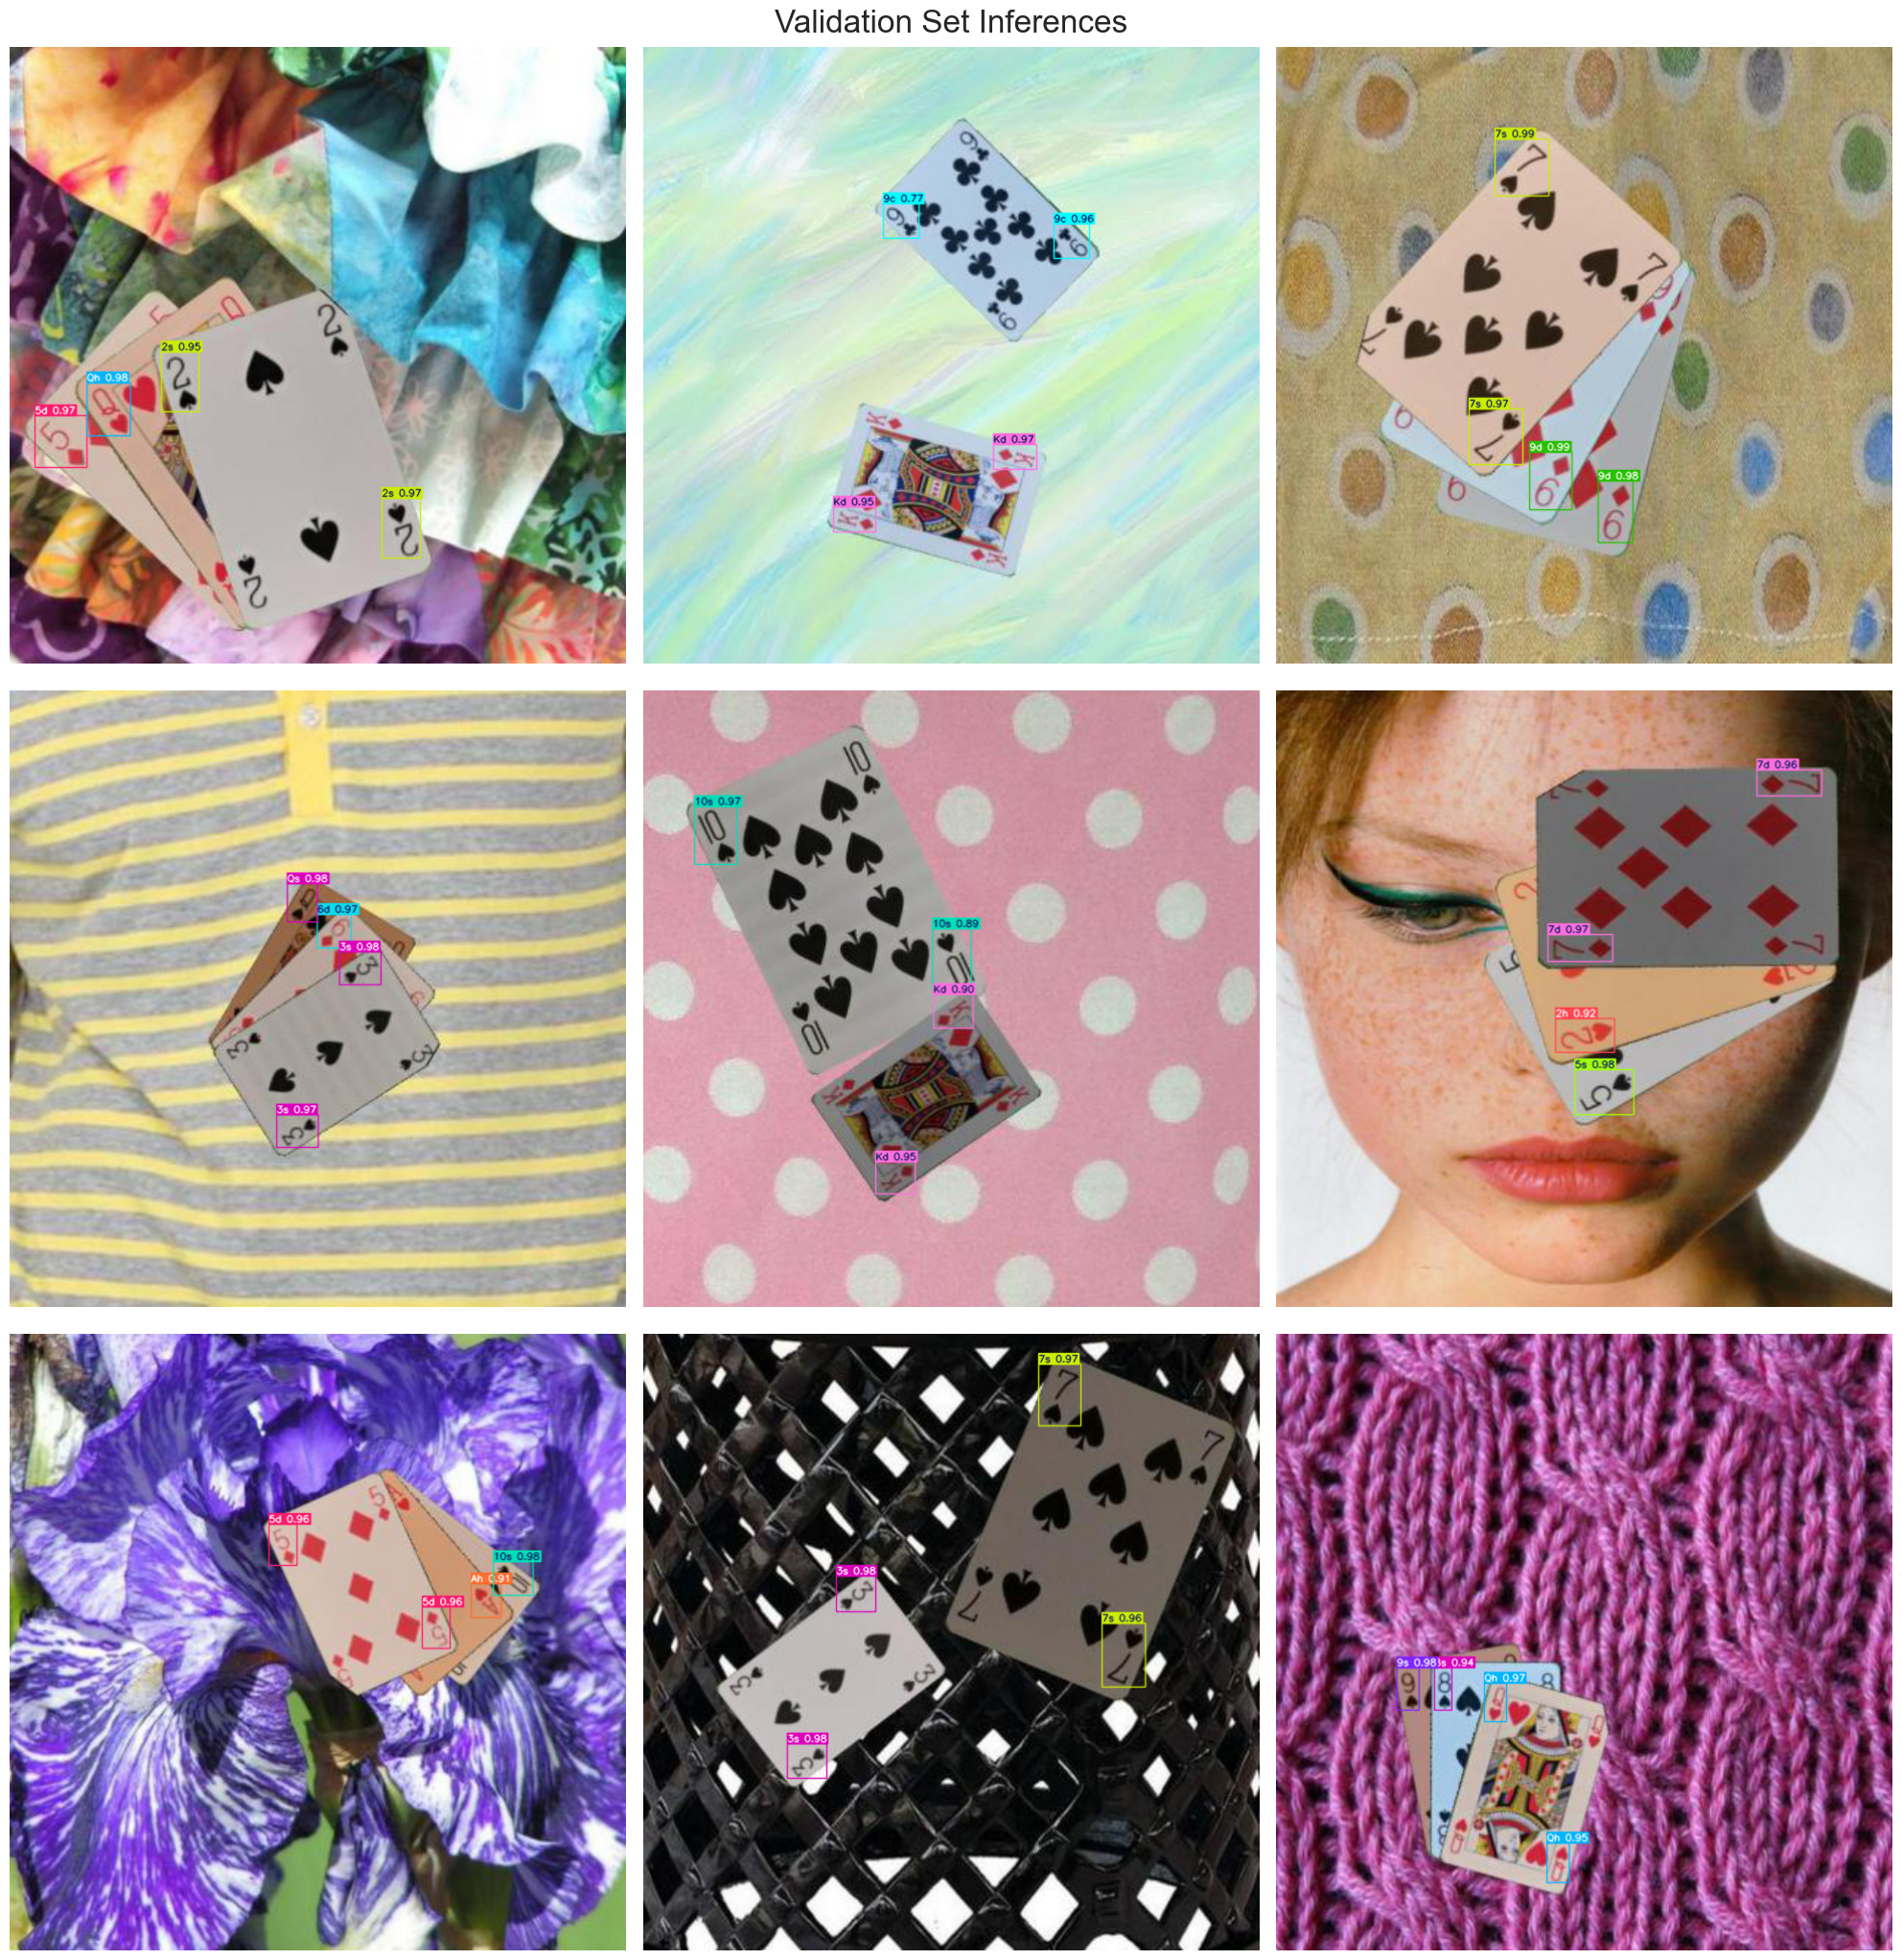

In [ ]:
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle("Validation Set Inferences", fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(test_images_path, selected_images[i])
            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = cv2.resize(image, (640, 640))  # Direct resize
                normalized_image = resized_image / 255.0  # Normalize
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(
                    source=normalized_image_uint8, imgsz=640, conf=0.5
                )

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()